In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



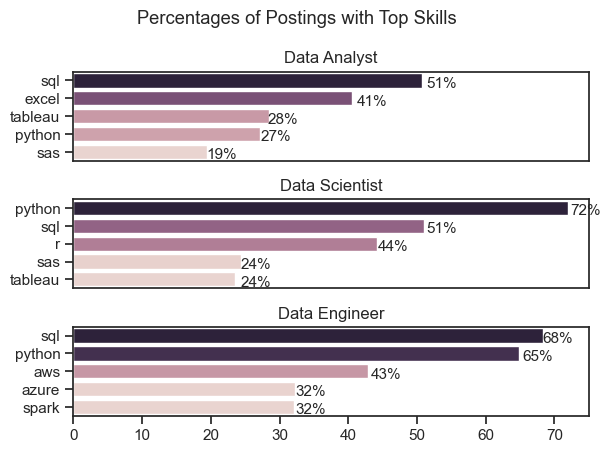

In [ ]:
df_us=df[df['job_country']=='United States'].copy()
df_skills = df_us.explode('job_skills')
job_total_count = df_us['job_title_short'].value_counts()
job_skills_count = df_skills.groupby('job_title_short')['job_skills'].value_counts().reset_index()
df_pct = pd.merge(left=job_skills_count, right=job_total_count, how='left', on='job_title_short')
df_pct = df_pct.rename(columns={'count_x': 'skill_count', 'count_y': 'job_count'})
df_pct['percentage'] = (df_pct['skill_count']/df_pct['job_count'])*100
top_3 = df_us['job_title_short'].value_counts().head(3)
top_3 = list(top_3.index)
sns.set_theme(style='ticks')
fig, ax = plt.subplots(3,1)
for i, job in enumerate(top_3):
    job_skills = df_pct[df_pct['job_title_short'] == job].value_counts().reset_index()
    job_skills = job_skills.sort_values(by='skill_count', ascending=False).head()
    job_skills = job_skills.reset_index()
    sns.barplot(data=job_skills, x='percentage', y='job_skills', ax=ax[i], hue= 'percentage', legend = False)
    ax[i].set_title(f'{job}')
    ax[i].set_xlim(0, 75)
    fig.tight_layout()
    fig.suptitle('Percentages of Postings with Top Skills')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    plt.rcParams['font.size'] = 11.
    for n, v in enumerate(job_skills['percentage']):
        v = round(v)
        ax[i].text(v+.3, n+.4, f'{v}%')
    ax[2].set_xticks([0, 10, 20, 30, 40, 50, 60, 70 ])
